# Hough Transform
By Tyler Yang <br>
Corresponding Medium article linked here: https://medium.com/@tjyang2005/the-hough-transform-in-image-processing-2fc1e453ebc9

The goal is to find the line that passes through (3,2) and (2,1) in the Cartesian plane. This a simple task compared to what the Hough Transform is usually used for; the Hough Transform works better with more and more points.

In [88]:
import numpy as np
import matplotlib.pyplot as plt

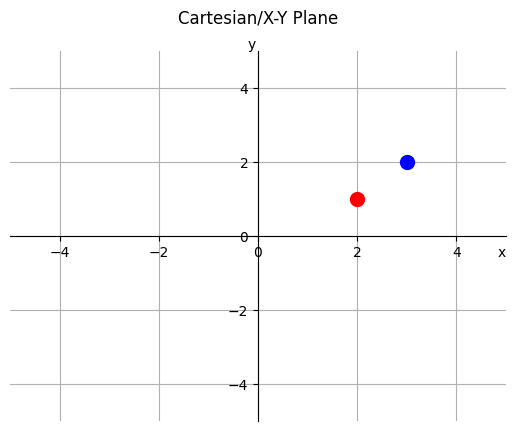

In [89]:
fig1, ax1 = plt.subplots()
plt.title('Cartesian/X-Y Plane',pad=20)
ax1.grid()

# Set Origin Axes
ax1.spines['left'].set_position('zero')
ax1.spines['right'].set_color('none')
ax1.spines['bottom'].set_position('zero')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.set_xlabel('x', loc='right', labelpad=-10)
ax1.set_ylabel('y', loc='top', rotation='horizontal', labelpad=-20)
ax1.set_xlim(-5,5)
ax1.set_ylim(-5,5)

ax1.plot(3, 2, marker="o", markersize=10, markeredgecolor="blue", markerfacecolor="blue")
ax1.plot(2, 1, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")

## Traditional Algebra Method
Traditionally, lines in the x-y plane are represented by y = mx + b. This is the slope intercept form of lines in the x-y plane. <br>
In high school algebra classes, to find a line that passes through two points, you would use the slope formula. <br>
<br>
m = (y2 - y1) / (x2 - x1) <br>
<br>
Once you solved for m, you could substitute in your values for x, y, and m to find b. Let's do this for our example problem. <br>
<br>
m  = (1 - 2) / (2 - 3) = -1 / -1 = 1 <br>
y = 1x + b <br>
1 = 1 * 2 + b <br>
b = -1 <br>
### The solution to our problem is y = x - 1.

## Slope-intercept Parametrization <br>
For the point (3,2):<br>
  y = mx + b <br>
  2 = 3m + b <br>
  b = -3m + 2 <br>
For the point (2,1): <br>
  y = mx + b <br>
  1 = 2m + b <br>
  b = -2m + 1 <br>

Below are these lines visualized in the slope-intercept parametrized space.

Text(1, -1, '  (1,-1)')

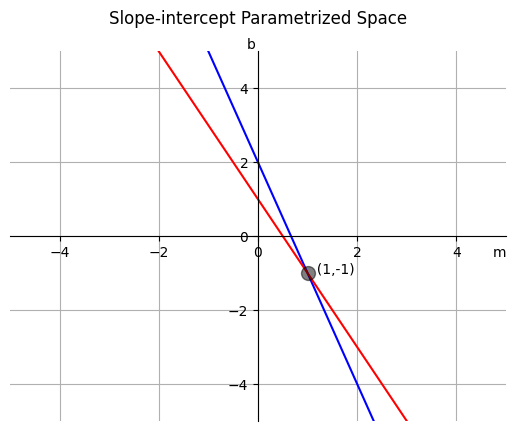

In [90]:
fig2, ax2 = plt.subplots()
plt.title('Slope-intercept Parametrized Space',pad=20)
ax2.grid()

# Set Origin Axes
ax2.spines['left'].set_position('zero')
ax2.spines['right'].set_color('none')
ax2.spines['bottom'].set_position('zero')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.set_xlabel('m', loc='right', labelpad=-10)
ax2.set_ylabel('b', loc='top', rotation='horizontal', labelpad=-20)
ax2.set_xlim(-5,5)
ax2.set_ylim(-5,5)

m = np.linspace(-5,5,200)
ax2.plot(m, -3*m + 2, color='blue')
ax2.plot(m, -2*m + 1, color='red')

ax2.plot(1, -1, marker="o", markersize=10, markeredgecolor="black", markerfacecolor='black',alpha=0.5)
ax2.annotate("  (1,-1)", (1, -1))

To find the solution to our equation, we find the intersection of the parametrized equations. <br>
b = -2m + 1 and b = -3m + 2 <br>
-2m + 1 = -3m + 2 <br>
m = 1 <br>
b = -2 * 1 + 1 = -1 <br>
### Thus, our solution is y = x - 1.

## Rho-theta Parametrization.<br>
ρ = x * cos(θ) + y * sin(θ) <br>
We substitute our (x,y) coordinates in to find our parametrized equations. <br>
ρ = 3 * cos(θ) + 2 * sin(θ) <br>
ρ = 2 * cos(θ) + 1 * sin(θ) <br>
Below are these two equations visualized in rho-theta parametrized space.

Text(2.356194490192345, -0.7071067811865476, '  (3π/4,-√2/2)')

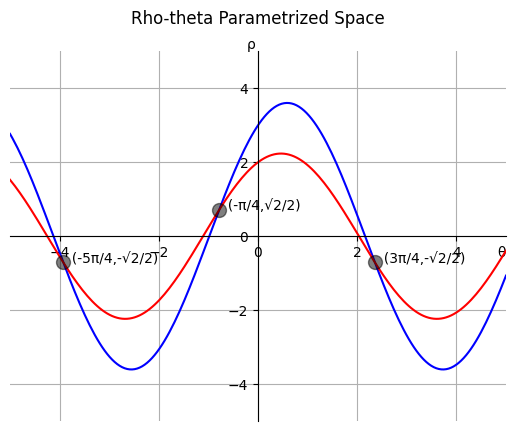

In [91]:
fig3, ax3 = plt.subplots()
plt.title('Rho-theta Parametrized Space',pad=20)
ax3.grid()

# Set Origin Axes
ax3.spines['left'].set_position('zero')
ax3.spines['right'].set_color('none')
ax3.spines['bottom'].set_position('zero')
ax3.spines['top'].set_color('none')
ax3.xaxis.set_ticks_position('bottom')
ax3.yaxis.set_ticks_position('left')
ax3.set_xlabel('θ', loc='right', labelpad=-10)
ax3.set_ylabel('ρ', loc='top', rotation='horizontal', labelpad=-20)
ax3.set_xlim(-5,5)
ax3.set_ylim(-5,5)

theta = np.linspace(-5,5,200)
ax3.plot(theta, 3 * np.cos(theta) + 2 * np.sin(theta), color='blue')
ax3.plot(theta, 2* np.cos(theta) + 1 * np.sin(theta), color='red')

ax3.plot(-5*np.pi/4, -np.sqrt(2)/2, marker="o", markersize=10, markeredgecolor="black", markerfacecolor='black',alpha=0.5)
ax3.plot(-1*np.pi/4, np.sqrt(2)/2, marker="o", markersize=10, markeredgecolor="black", markerfacecolor='black',alpha=0.5)
ax3.plot(3*np.pi/4, -np.sqrt(2)/2, marker="o", markersize=10, markeredgecolor="black", markerfacecolor='black',alpha=0.5)
ax3.annotate("  (-5π/4,-√2/2)", (-5*np.pi/4, -np.sqrt(2)/2))
ax3.annotate("  (-π/4,√2/2)", (-1*np.pi/4, np.sqrt(2)/2))
ax3.annotate("  (3π/4,-√2/2)", (3*np.pi/4, -np.sqrt(2)/2))

To find the solution to our equation, we find the intersection points of our equations, shown on the figure above. <br>
Substituting these back into our original equation of the form ρ = x * cos(θ) + y * sin(θ) is as follows: <br>
Using (-5π/4,-√2/2): <br>
-√2/2 = x * cos(-5π/4) + y * sin(-5π/4) = x * (-√2/2) + y * (√2/2). Dividing the entire equation by -√2/2 gives us <br>
1 = x - y. <br>

Using (-π/4,√2/2): <br>
√2/2 = x * cos(-π/4) + y * sin(-π/4) = x * (√2/2) + y * (-√2/2). Dividing the entire equation by √2/2 gives us <br>
1 = x - y. <br>

Using (3π/4,-√2/2): <br>
-√2/2 = x * cos(3π/4) + y * sin(3π/4) = x * (-√2/2) + y * (√2/2). Dividing the entire equation by -√2/2 gives us <br>
1 = x - y. <br>
After rearranging 1 = x-y, <br>
### We find that the solution to our equation is y = x - 1.


Let's confirm our solution, y = x - 1, which we have obtained through three different methods.

Text(-2, -2.5, 'y = x - 1')

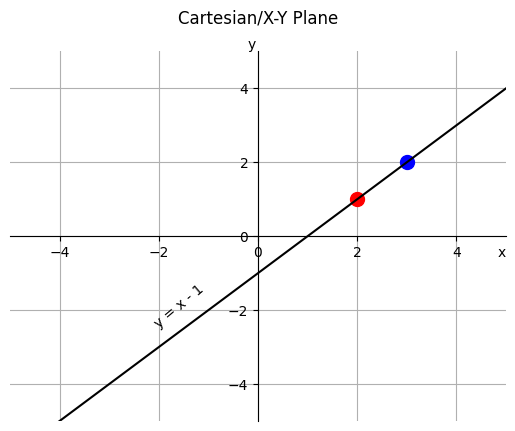

In [92]:
# Same graph from earlier
fig1, ax1 = plt.subplots()
plt.title('Cartesian/X-Y Plane',pad=20)
ax1.grid()

# Set Origin Axes
ax1.spines['left'].set_position('zero')
ax1.spines['right'].set_color('none')
ax1.spines['bottom'].set_position('zero')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.set_xlabel('x', loc='right', labelpad=-10)
ax1.set_ylabel('y', loc='top', rotation='horizontal', labelpad=-20)
ax1.set_xlim(-5,5)
ax1.set_ylim(-5,5)

ax1.plot(3, 2, marker="o", markersize=10, markeredgecolor="blue", markerfacecolor="blue")
ax1.plot(2, 1, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")

x = np.linspace(-5,5,200)
ax1.plot(x,x-1, color='black')
ax1.annotate("y = x - 1", (-2, -2.5), rotation=40, rotation_mode='anchor')